In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict,StratifiedShuffleSplit,cross_validate,cross_validate,ShuffleSplit
from sklearn.decomposition import PCA

In [2]:
# df_score = pd.read_csv("../Feature_selection/ft_important.csv")
# df_score.drop(columns=["Unnamed: 0"], inplace=True)
# df_score

In [3]:
# fti_index = df_score['index'].values
# fti_index = fti_index.astype(dtype=str)
# fti_index = np.insert(fti_index,0,'0')


In [4]:
# ranks = []
# for i in range(len(list_feature)):
#     arr = []
#     for j in range(i+1):
#         arr.append(list_feature[j])
#     ranks.append(arr)
# ranks

In [5]:
df_train = pd.read_csv("../df_train_pso.csv")
df_train.drop(columns=["Unnamed: 0"],inplace=True)
df_train

,Rhythm,PatientAge,Gender,Rcount_lead1,RRInterval_mean_lead1,RRInterval_std_lead1,QT_intervals_var_lead1,PR_intervals_mean_lead1,PR_segment_mean_lead1,PR_segment_var_lead1,...,Qcount_lead11,ST_segment_mean_lead11,Rcount_lead12,RRInterval_median_lead12,RRInterval_range_lead12,RRInterval_skew_lead12,RRInterval_kurtosis_lead12,R_peaks_amplitude_from_isoelectric_mean_lead12,Qcount_lead12,PR_segment_mean_lead12
0,3,0.456183,1,2.313163,0.381475,0.041064,0.000019,0.124970,-0.618281,0.001515,...,29.0,-0.184178,2.314183,0.380859,0.058467,1.456159,1.804519,0.764069,30.0,0.002074
1,0,1.402339,1,1.044654,0.880707,1.874749,0.000000,1.715935,4.769596,2.236628,...,4.0,1.225579,1.045115,0.873007,1.882629,0.025357,-1.223340,3.526872,3.0,0.996510
2,1,1.368548,1,0.671563,1.334546,0.250454,0.002375,2.122088,4.074030,0.087646,...,7.0,1.489339,0.671860,1.341661,0.233867,-0.752008,-0.916225,1.287138,7.0,4.491185
3,1,0.844783,0,0.671563,1.262942,0.276685,0.429776,0.884404,-1.402173,0.225874,...,8.0,1.803774,0.746511,1.261285,3.391071,-2.440756,4.027672,1.151314,8.0,3.592259
4,0,1.115113,1,0.671563,1.391335,8.379536,0.589014,2.523434,7.364169,2.511923,...,8.0,1.826430,0.671860,1.293435,7.881317,0.684815,-0.853637,2.071577,6.0,4.468224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,2,1.351652,0,0.895418,1.001106,0.341096,2.768143,1.071422,1.228532,0.882024,...,11.0,1.354048,0.895813,1.001609,0.339107,-0.250734,-1.102293,0.693319,11.0,-0.473416
8512,0,1.081322,1,1.044654,0.851458,1.631888,3.190118,1.323401,3.282778,0.342559,...,1.0,-0.409284,1.045115,0.855695,1.917709,0.372443,-0.373761,2.989072,4.0,-1.494766
8513,2,0.067583,0,1.044654,0.854877,0.987437,0.399927,0.780878,0.896847,0.087124,...,10.0,0.960356,1.045115,0.885373,0.935468,-0.553992,-1.246738,0.667144,10.0,1.099376
8514,1,0.642035,1,0.671563,1.249054,0.722168,0.425762,0.586398,-0.971584,0.360905,...,7.0,1.286971,0.746511,1.276124,0.818534,-1.033128,0.224218,1.014954,9.0,5.496880


In [6]:
# df_train = df_train[fti_index]

In [7]:
df_train

,Rhythm,PatientAge,Gender,Rcount_lead1,RRInterval_mean_lead1,RRInterval_std_lead1,QT_intervals_var_lead1,PR_intervals_mean_lead1,PR_segment_mean_lead1,PR_segment_var_lead1,...,Qcount_lead11,ST_segment_mean_lead11,Rcount_lead12,RRInterval_median_lead12,RRInterval_range_lead12,RRInterval_skew_lead12,RRInterval_kurtosis_lead12,R_peaks_amplitude_from_isoelectric_mean_lead12,Qcount_lead12,PR_segment_mean_lead12
0,3,0.456183,1,2.313163,0.381475,0.041064,0.000019,0.124970,-0.618281,0.001515,...,29.0,-0.184178,2.314183,0.380859,0.058467,1.456159,1.804519,0.764069,30.0,0.002074
1,0,1.402339,1,1.044654,0.880707,1.874749,0.000000,1.715935,4.769596,2.236628,...,4.0,1.225579,1.045115,0.873007,1.882629,0.025357,-1.223340,3.526872,3.0,0.996510
2,1,1.368548,1,0.671563,1.334546,0.250454,0.002375,2.122088,4.074030,0.087646,...,7.0,1.489339,0.671860,1.341661,0.233867,-0.752008,-0.916225,1.287138,7.0,4.491185
3,1,0.844783,0,0.671563,1.262942,0.276685,0.429776,0.884404,-1.402173,0.225874,...,8.0,1.803774,0.746511,1.261285,3.391071,-2.440756,4.027672,1.151314,8.0,3.592259
4,0,1.115113,1,0.671563,1.391335,8.379536,0.589014,2.523434,7.364169,2.511923,...,8.0,1.826430,0.671860,1.293435,7.881317,0.684815,-0.853637,2.071577,6.0,4.468224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,2,1.351652,0,0.895418,1.001106,0.341096,2.768143,1.071422,1.228532,0.882024,...,11.0,1.354048,0.895813,1.001609,0.339107,-0.250734,-1.102293,0.693319,11.0,-0.473416
8512,0,1.081322,1,1.044654,0.851458,1.631888,3.190118,1.323401,3.282778,0.342559,...,1.0,-0.409284,1.045115,0.855695,1.917709,0.372443,-0.373761,2.989072,4.0,-1.494766
8513,2,0.067583,0,1.044654,0.854877,0.987437,0.399927,0.780878,0.896847,0.087124,...,10.0,0.960356,1.045115,0.885373,0.935468,-0.553992,-1.246738,0.667144,10.0,1.099376
8514,1,0.642035,1,0.671563,1.249054,0.722168,0.425762,0.586398,-0.971584,0.360905,...,7.0,1.286971,0.746511,1.276124,0.818534,-1.033128,0.224218,1.014954,9.0,5.496880


In [8]:
x_train = df_train.iloc[:,1:].values    
y_train = df_train.iloc[:,0].values

In [9]:
def apply_pca(x, n):
    pca = PCA(n_components= n)
    result = pca.fit_transform(x)
    return result

In [10]:
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
# x_train = apply_pca(x_train, len(x_train[0]))

In [11]:
df_test = pd.read_csv("../df_test_pso.csv")
df_test.drop(columns=["Unnamed: 0"],inplace=True)
df_test

,Rhythm,PatientAge,Gender,Rcount_lead1,RRInterval_mean_lead1,RRInterval_std_lead1,QT_intervals_var_lead1,PR_intervals_mean_lead1,PR_segment_mean_lead1,PR_segment_var_lead1,...,Qcount_lead11,ST_segment_mean_lead11,Rcount_lead12,RRInterval_median_lead12,RRInterval_range_lead12,RRInterval_skew_lead12,RRInterval_kurtosis_lead12,R_peaks_amplitude_from_isoelectric_mean_lead12,Qcount_lead12,PR_segment_mean_lead12
0,0,1.436130,1,1.790836,0.489525,1.005687,1.136613,0.667261,1.324888,0.497929,...,11.0,0.426137,1.791626,0.489675,1.052401,-0.009576,-1.247569,1.980089,10.0,0.458073
1,0,1.182696,1,0.820800,1.116772,3.179971,0.619290,1.695107,4.784317,1.824051,...,7.0,1.443657,0.821162,1.081985,3.964045,1.644825,2.326858,0.828798,8.0,2.576232
2,2,0.726513,0,0.820800,1.141216,0.361658,0.204018,1.083074,1.236562,0.446568,...,10.0,1.211109,0.821162,1.145049,0.327414,-0.079076,-1.543403,0.794161,4.0,0.892038
3,1,1.098217,1,0.671563,1.287325,0.175123,0.629861,0.908436,-0.121448,1.277346,...,2.0,0.848128,0.671860,1.284780,0.187094,0.910720,-0.450520,1.107166,8.0,-1.458602
4,1,0.692722,0,0.746182,1.280363,0.338447,0.636173,0.954099,0.451443,1.742526,...,9.0,1.690343,0.746511,1.278597,0.362494,0.275635,-1.027188,0.405492,9.0,0.650946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,0,1.165800,0,1.343127,0.677113,3.219273,1.376637,1.200434,2.473124,0.497239,...,14.0,0.285295,1.343719,0.586127,3.262444,0.953688,-0.590095,0.951139,17.0,1.301893
2126,0,1.250278,1,1.492363,0.588944,1.094960,0.293431,0.935673,2.257216,0.448087,...,13.0,0.574858,1.493021,0.566342,1.192722,2.522238,4.465922,0.750163,15.0,0.762725
2127,1,0.895469,0,0.671563,1.289177,0.474791,0.019671,1.619805,2.572491,0.042581,...,2.0,1.800850,0.671860,1.290962,0.479427,0.356419,-0.924803,0.809545,3.0,8.582848
2128,1,1.334756,1,0.596945,1.426785,0.318640,0.351651,0.590518,-0.656135,0.365226,...,7.0,1.470499,0.597209,1.422037,0.268947,0.074376,-1.533974,0.843326,7.0,-0.220426


In [12]:
# df_test = df_test[fti_index]

In [13]:
df_test

,Rhythm,PatientAge,Gender,Rcount_lead1,RRInterval_mean_lead1,RRInterval_std_lead1,QT_intervals_var_lead1,PR_intervals_mean_lead1,PR_segment_mean_lead1,PR_segment_var_lead1,...,Qcount_lead11,ST_segment_mean_lead11,Rcount_lead12,RRInterval_median_lead12,RRInterval_range_lead12,RRInterval_skew_lead12,RRInterval_kurtosis_lead12,R_peaks_amplitude_from_isoelectric_mean_lead12,Qcount_lead12,PR_segment_mean_lead12
0,0,1.436130,1,1.790836,0.489525,1.005687,1.136613,0.667261,1.324888,0.497929,...,11.0,0.426137,1.791626,0.489675,1.052401,-0.009576,-1.247569,1.980089,10.0,0.458073
1,0,1.182696,1,0.820800,1.116772,3.179971,0.619290,1.695107,4.784317,1.824051,...,7.0,1.443657,0.821162,1.081985,3.964045,1.644825,2.326858,0.828798,8.0,2.576232
2,2,0.726513,0,0.820800,1.141216,0.361658,0.204018,1.083074,1.236562,0.446568,...,10.0,1.211109,0.821162,1.145049,0.327414,-0.079076,-1.543403,0.794161,4.0,0.892038
3,1,1.098217,1,0.671563,1.287325,0.175123,0.629861,0.908436,-0.121448,1.277346,...,2.0,0.848128,0.671860,1.284780,0.187094,0.910720,-0.450520,1.107166,8.0,-1.458602
4,1,0.692722,0,0.746182,1.280363,0.338447,0.636173,0.954099,0.451443,1.742526,...,9.0,1.690343,0.746511,1.278597,0.362494,0.275635,-1.027188,0.405492,9.0,0.650946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,0,1.165800,0,1.343127,0.677113,3.219273,1.376637,1.200434,2.473124,0.497239,...,14.0,0.285295,1.343719,0.586127,3.262444,0.953688,-0.590095,0.951139,17.0,1.301893
2126,0,1.250278,1,1.492363,0.588944,1.094960,0.293431,0.935673,2.257216,0.448087,...,13.0,0.574858,1.493021,0.566342,1.192722,2.522238,4.465922,0.750163,15.0,0.762725
2127,1,0.895469,0,0.671563,1.289177,0.474791,0.019671,1.619805,2.572491,0.042581,...,2.0,1.800850,0.671860,1.290962,0.479427,0.356419,-0.924803,0.809545,3.0,8.582848
2128,1,1.334756,1,0.596945,1.426785,0.318640,0.351651,0.590518,-0.656135,0.365226,...,7.0,1.470499,0.597209,1.422037,0.268947,0.074376,-1.533974,0.843326,7.0,-0.220426


In [14]:
x_test = df_test.iloc[:,1:].values
y_test = df_test.iloc[:,0].values

In [15]:
x_test = scale.transform(x_test)
# x_test = apply_pca(x_test, len(x_test[0]))

In [16]:
# Create based model
level0 = list()
level0.append(('RF', RandomForestClassifier(criterion='log_loss', max_depth=5, max_features='sqrt', n_estimators=50)))
level0.append(('AB', AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.01, n_estimators=1000)))
level0.append(('GB', GradientBoostingClassifier(criterion= 'squared_error',learning_rate= 0.1,loss= 'log_loss',n_estimators= 200)))
level0.append(('XGB', XGBClassifier(gamma=0, learning_rate = 0.1, max_depth= 3, min_child_weight= 1, n_estimators= 1000)))
level0.append(('LGB', LGBMClassifier(boosting= 'gbdt', data_sample_strategy= 'goss', estimators= 50, learning_rate=0.1, objective= 'multiclass')))


level1 = list()
level1.append(('LR', LogisticRegression(C= 10, max_iter= 200, penalty= 'l2', solver= 'saga')))
level1.append(('SVM', SVC(C= 10, gamma= 'scale', kernel= 'rbf', probability= True)))
level1.append(('DT', DecisionTreeClassifier(criterion= 'gini',max_depth= 5,max_features= 'sqrt',splitter= 'best')))
level1.append(('KNN', KNeighborsClassifier(algorithm= 'auto', n_neighbors= 5, p= 1, weights= 'uniform')))
level1.append(('CB', CatBoostClassifier(iterations= 300, learning_rate=0.1)))

In [17]:
from sklearn.model_selection import KFold,StratifiedKFold,StratifiedShuffleSplit,StratifiedGroupKFold
import warnings
warnings.filterwarnings('ignore')

kf = KFold(n_splits=20,random_state=None)

train_news = np.empty((x_train.shape[0], 0))
test_news = np.empty((x_test.shape[0], 0))

for name, model in level0:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(x_train, y_train)):
        print(f"Fold {i}")
        print(f"train: {len(train_index)}")
        print(f"test: {len(test_index)}")
        # Train model in 4/5
        model.fit(x_train[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(x_train[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(x_train, y_train)
    test_model = model.predict(x_test)
    # Add column to news data
    train_news = np.column_stack((train_news, np.array(train_model).reshape(-1, 1)))
    test_news = np.column_stack((test_news, np.array(test_model).reshape(-1, 1)))
    print("-------Done-------")


Model: RF
----------------
Fold 0
train: 8090
test: 426
Fold 1
train: 8090
test: 426
Fold 2
train: 8090
test: 426
Fold 3
train: 8090
test: 426
Fold 4
train: 8090
test: 426
Fold 5
train: 8090
test: 426
Fold 6
train: 8090
test: 426
Fold 7
train: 8090
test: 426
Fold 8
train: 8090
test: 426
Fold 9
train: 8090
test: 426
Fold 10
train: 8090
test: 426
Fold 11
train: 8090
test: 426
Fold 12
train: 8090
test: 426
Fold 13
train: 8090
test: 426
Fold 14
train: 8090
test: 426
Fold 15
train: 8090
test: 426
Fold 16
train: 8091
test: 425
Fold 17
train: 8091
test: 425
Fold 18
train: 8091
test: 425
Fold 19
train: 8091
test: 425
-------Done-------
Model: AB
----------------
Fold 0
train: 8090
test: 426
Fold 1
train: 8090
test: 426
Fold 2
train: 8090
test: 426
Fold 3
train: 8090
test: 426
Fold 4
train: 8090
test: 426
Fold 5
train: 8090
test: 426
Fold 6
train: 8090
test: 426
Fold 7
train: 8090
test: 426
Fold 8
train: 8090
test: 426
Fold 9
train: 8090
test: 426
Fold 10
train: 8090
test: 426
Fold 11
train: 80

KeyboardInterrupt: 

In [ ]:
warnings.filterwarnings('ignore')

train_news_final = np.empty((train_news.shape[0], 0))
test_news_final = np.empty((test_news.shape[0], 0))

for name, model in level1:
    print(f"Model: {name}")
    print("----------------")
    train_model = []
    for i,(train_index, test_index) in enumerate(kf.split(train_news, y_train)):
        print(f"Fold {i}")
        # Train model in 4/5
        model.fit(train_news[train_index], y_train[train_index])
        # predict model in 1/5
        y_pred = model.predict(train_news[test_index])
        train_model.extend(y_pred)
    # Predict on test set
    model.fit(train_news, y_train)
    test_model = model.predict(test_news)
    # Add column to news data
    train_news_final = np.column_stack((train_news_final, np.array(train_model).reshape(-1, 1)))
    test_news_final = np.column_stack((test_news_final, np.array(test_model).reshape(-1, 1)))
    print("-------Done-------")

Model: LR
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
-------Done-------
Model: SVM
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
-------Done-------
Model: DT
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
-------Done-------
Model: KNN
----------------
Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fold 10
Fold 11
Fold 12
Fold 13
Fold 14
-------Done-------
Model: CB
----------------
Fold 0
0:	learn: 1.1330089	total: 3.21ms	remaining: 960ms
1:	learn: 0.9612556	total: 5.46ms	remaining: 813ms
2:	learn: 0.8328847	total: 8.54ms	remaining: 845ms
3:	learn: 0.7327602	total: 11.3ms	remaining: 836ms
4:	learn: 0.6515944	total: 14ms	remaining: 829ms
5:	learn: 0.5860936	total: 16.1ms	remaining: 789ms
6:	learn: 0.5303340	total: 18.9ms	re

In [34]:
# train_news_final = pd.read_csv("../train_news_final_fre.csv")
# test_news_final = pd.read_csv("../test_news_final_fre.csv")
# train_news_final.drop(columns=["Unnamed: 0"], inplace=True)
# test_news_final.drop(columns=["Unnamed: 0"], inplace=True)
# train_news_final = train_news_final.values
# test_news_final = test_news_final.values

In [35]:
from sklearn.model_selection import GridSearchCV
meta_model = KNeighborsClassifier()
params = {
    'n_neighbors': [4,5,6],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1,2,3]
}
GS = GridSearchCV(estimator=meta_model, param_grid=params, cv=3, verbose=5)
GS.fit(train_news_final, y_train)
GS.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END algorithm=auto, n_neighbors=4, p=1, weights=uniform;, score=0.960 total time=   0.2s
[CV 2/3] END algorithm=auto, n_neighbors=4, p=1, weights=uniform;, score=0.955 total time=   0.1s
[CV 3/3] END algorithm=auto, n_neighbors=4, p=1, weights=uniform;, score=0.961 total time=   0.1s
[CV 1/3] END algorithm=auto, n_neighbors=4, p=1, weights=distance;, score=0.960 total time=   0.0s
[CV 2/3] END algorithm=auto, n_neighbors=4, p=1, weights=distance;, score=0.955 total time=   0.0s
[CV 3/3] END algorithm=auto, n_neighbors=4, p=1, weights=distance;, score=0.961 total time=   0.0s
[CV 1/3] END algorithm=auto, n_neighbors=4, p=2, weights=uniform;, score=0.960 total time=   0.1s
[CV 2/3] END algorithm=auto, n_neighbors=4, p=2, weights=uniform;, score=0.955 total time=   0.2s
[CV 3/3] END algorithm=auto, n_neighbors=4, p=2, weights=uniform;, score=0.960 total time=   0.1s
[CV 1/3] END algorithm=auto, n_neighbors=4, p=2, weig

KNeighborsClassifier(weights='distance')

In [36]:
best_model = GS.best_estimator_
y_pred = best_model.predict(test_news_final)

In [37]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix,f1_score,precision_score,accuracy_score,recall_score,precision_recall_fscore_support
def evaluation_test(y,y_pred):
    cm = confusion_matrix(y,y_pred)
    disp = ConfusionMatrixDisplay(cm,display_labels=['AFIB','SB','SR','GSVT'])
    disp.plot()
    plt.show()
    n_classes = len(cm)
    result = []
    for c in range(n_classes):
        tp = cm[c,c]
        fp = sum(cm[:,c]) - cm[c,c]
        fn = sum(cm[c,:]) - cm[c,c]
        tn = sum(np.delete(sum(cm)-cm[c,:],c))
        acc = (tp+tn) / (tp+fn+tn+fp)
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        specificity = tn/(tn+fp)
        f1_score = 2*((precision*recall)/(precision+recall))
        if c+1 == 1:
            Rhythm = 'AFIB'
        elif c+1 == 2:
            Rhythm = 'SB'
        elif c+1 == 3:
            Rhythm = 'SR'
        else:
            Rhythm = 'GSVT'
        result.append([Rhythm,acc,recall,precision,f1_score,specificity])
    p_macro,r_macro,f_macro,support_macro = precision_recall_fscore_support(y,y_pred,average='macro')
    p_micro,r_micro,f_micro,support_micro = precision_recall_fscore_support(y,y_pred,average='micro')
    p_weighted,r_weighted,f_weighted,support_weighted = precision_recall_fscore_support(y,y_pred,average='weighted')
    result.append(['macro avg',None,f_macro,p_macro,r_macro,None])
    result.append(['micro avg',None,f_micro,p_micro,r_micro,None])
    result.append(['weighted avg',None,f_weighted,p_weighted,r_weighted,None])
    return result
        

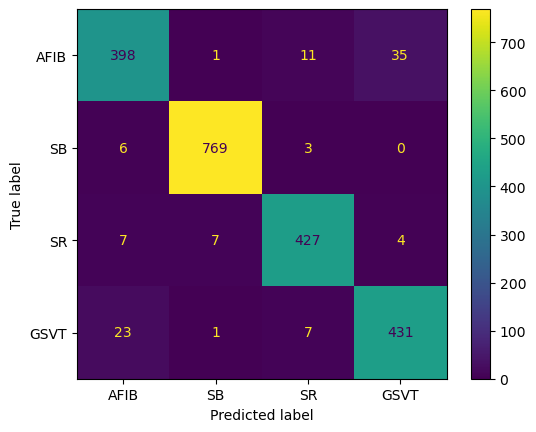

,Rhythm Group,ACC,F1-score,Precision,Recall,specificity
0,AFIB,0.961033,0.894382,0.917051,0.905575,0.978635
1,SB,0.991549,0.988432,0.988432,0.988432,0.993343
2,SR,0.981690,0.959551,0.953125,0.956327,0.987537
3,GSVT,0.967136,0.932900,0.917021,0.924893,0.976619
4,macro avg,NaN,0.943807,0.943907,0.943816,NaN
5,micro avg,NaN,0.950704,0.950704,0.950704,NaN
6,weighted avg,NaN,0.950632,0.950654,0.950704,NaN


In [38]:
evaluation_test = evaluation_test(y_test,y_pred)
df_evaluation_test = pd.DataFrame(data=evaluation_test,columns=["Rhythm Group","ACC","F1-score","Precision","Recall","specificity"])
df_evaluation_test

In [39]:
# df_evaluation_test.to_csv("../Result/Stacking_multipleClass_frequency_split10_KNN.csv")